In [3]:
import pandas as pd
from collections import Counter

In [4]:
# Load the df
df_main = pd.read_csv('lingbuzz_2_7537.csv')

# Drop nan entries
df_main.dropna(subset=['Title'], inplace=True)

In [5]:
# Date format to the Date column
df_main['Date'] = pd.to_datetime(df_main['Date'])
df_main['Date'] = df_main['Date'].dt.strftime('%Y-%m')

In [6]:
df_main.head(5)

,Id,Title,Authors,Keywords,Published_in,Date,Downloads,Abstract
0,lingbuzz/005,The Typology of Structural Deficiency,"Anna Cardinaletti, Michal Starke","principles and parameters, clitics, syntax, pr...",None,1994-10,4067.0,We argue that there is an intermediate class o...
1,lingbuzz/007,The Lexical Syntax and Lexical Semantics of th...,"Gillian Ramchand, Peter Svenonius","complex predicate, syntax, small clause, resul...",Proceedings of WCCFL Santa Cruz,2002-03,2919.0,NaN
2,lingbuzz/0012,Issues in adverbial syntax,Guglielmo Cinque,syntax,None,2002-07,1372.0,NaN
3,lingbuzz/0013,VP-Preposing and Relative Scope,"Laura Rimmel, Thomas Leu","vp-preposing, scope, remnant movement",UPenn Working Papers in Linguistics 11.1: Proc...,2004-05,213.0,NaN
4,lingbuzz/0014,Eliminating Positions,Oystein Nilsen,"fseq, functional heads, verb movement, verb se...",None,2003-01,804.0,This dissertation argues that phenomena like a...


In [7]:
top_ten_ms_downloads = df_main.sort_values(by='Downloads', ascending=False)

top_ten_ms_downloads.head(10)

,Id,Title,Authors,Keywords,Published_in,Date,Downloads,Abstract
878,lingbuzz/001050,STUDENTS WRITING ERRORS IN EFL: A Case Study,Haifa Al-Buainain,learners writing errors: suggestions for teac...,Journal of Faculty of Education. University o...,2009-12,51045.0,Writing is a productive skill. It is one of th...
693,lingbuzz/00863,The Structure of Phonological Theory,Bridget Samuels,"phonology, pf interface, distributed morpholog...","PhD dissertation, Harvard University",2009-04,19389.0,"This dissertation focuses on ""the syntax of ph..."
1940,lingbuzz/002110,Pragmatic Reasoning through Semantic Inference,"Leon Bergen, Noah Goodman","pragmatics, game theory, hurford's constraint,...",Submitted,2015-10,19370.0,A number of recent proposals have used techniq...
7008,lingbuzz/007180,Modern language models refute Chomsky’s approa...,Steven Piantadosi,"large language model, minimalism, chomsky, gen...",None,2023-03,18756.0,The rise and success of large language models ...
1422,lingbuzz/001592,A Potpourri of Chomskyan Science,Christina Behme,"chomsky, chomsky's science of language, minima...","Philosophy in Review, http://journals.uvic.ca/...",2015-01,18618.0,This paper is an extension of a review of Noam...
298,lingbuzz/00411,Piraha Exceptionality: a Reassessment,"Andrew Ira Nevins, David Pesetsky, Cilene Rodr...","piraha, pirahã, recursion, embedding, universa...",None,2009-06,18248.0,Everett (2005) has claimed that the grammar of...
1988,lingbuzz/002159,"The Null Subject Parameter. Where are we, and ...",Roberta D'Alessandro,"null subjects, pro-drop, pro, partial null sub...","1st draft; published as: D'Alessandro, Roberta...",2014-07,14380.0,The NSP has been one of the most debated param...
655,lingbuzz/00825,Features in Minimalist Syntax,"Peter Svenonius, David Adger","features, minimalism, privative, checking, uni...",submitted to the Oxford Handbook of Linguistic...,2010-02,13982.0,We delineate some core conceptual issues that ...
7471,lingbuzz/00307,Verb Meaning and the Lexicon: A First Phase Sy...,Gillian Ramchand,"verbal decomposition, aktionsart, event struct...","(to appear), Cambridge University Press",2007-03,13387.0,This is a monograph exploring an event-decompo...
3565,lingbuzz/003737,Linguistic Missing Links.,Gerard Cheshire,"proto-romance, proto-italics, ms 408, voynich ...",Submitted.,2018-04,11600.0,Linguistic missing links: This paper explains ...


In [8]:
# A function to get the number of manuscripts per author

def ms_per_author(n = None):
    '''
    Parameters
    ----------
    n : int, optional
        Takes a number n and returns the n authors with the most manuscripts.
        If no n is introduced, it returns a dictionary with counts for all authors.

    Returns
    -------
    dictionary
        A dictionary with counts of manuscripts per author 

    '''
    authors = []
    for cell in df_main['Authors']:
        authors += cell.split(', ')
    if n == None:  
        return dict(Counter(authors))
    else:
        return dict(Counter(authors).most_common(n))

In [9]:
ten_most_prolific = ms_per_author(10)

ten_most_prolific

{'Shigeto Kawahara': 91,
 'Philippe Schlenker': 88,
 'Richard Kayne': 71,
 'Andrew Ira Nevins': 66,
 'Yosuke Sato': 65,
 'Chris Collins': 58,
 'Friederike Moltmann': 51,
 'Halldor Armann Sigurdsson': 48,
 'David Adger': 47,
 'Andrés Saab': 47}

In [10]:
def downloads_per_author(n = None):
    '''
    Parameters
    ----------
    n : int, optional
        Takes a number n and returns the n authors with the most downloads.
        If no n is introduced, it returns a dictionary with counts for all authors.

    Returns
    -------
    dictionary
        A dictionary with counts of downloads per author 

    '''
    authors_down = {}
    for i in range(len(df_main)):
        aut_paper = df_main.iloc[i, 2].split(', ')
        downloads = df_main.iloc[i, 6]
        for person in aut_paper:
            if person in authors_down.keys():
                authors_down[person] += downloads
            else:
                authors_down[person] = downloads
    if n == None:
        n = len(authors_down)
    
    sorted_n = sorted(authors_down.items(), key=lambda x: x[1], reverse=True)[:n]
    return dict(sorted_n)

In [11]:
ten_most_downloads = downloads_per_author(10)

ten_most_downloads

{'Philippe Schlenker': 131181.0,
 'Shigeto Kawahara': 114954.0,
 'Andrew Ira Nevins': 95966.0,
 'David Adger': 86918.0,
 'Peter Svenonius': 83339.0,
 'Lucas Champollion': 77732.0,
 'Halldor Armann Sigurdsson': 75178.0,
 'Michael Yoshitaka Erlewine': 73375.0,
 'Chris Collins': 72607.0,
 'David Pesetsky': 66965.0}

In [12]:
# A function to count keyword uses

def keyword_counter(n = None):
    '''
    Parameters
    ----------
    n : int, optional
        Takes a number n and returns the n most common keywords. If no n is introduced, it returns a dictionary with counts for all keywords.

    Returns
    -------
    dictionary
        A dictionary with counts of keywords 

    '''
    keywords = []
    for cell in df_main['Keywords']:
        keywords += cell.split(', ')
    keywords = [key.lower() for key in keywords]
    if n == None:  
        return dict(Counter(keywords))
    else:
        return dict(Counter(keywords).most_common(n))

In [13]:
top_150_keywords = keyword_counter(150)

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, background_color='white')

wordcloud.generate_from_frequencies(top_150_keywords)
        
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [15]:
# Steps to generate a graph with keyword trends

# This is a function that applied to a cell with keywords returns the
# linguistic subdisciplines listed there

def keyword_checker(cell):
    target_keywords = [ 'phonology', 'morphology', 'syntax', 'semantics']
    contained_keywords = []
    for word in target_keywords:
        if word in cell:
            contained_keywords.append(word)
    replacement = ' + '.join(contained_keywords)
    return replacement

In [16]:
#Let's create a new DataFrame
df_key = pd.DataFrame()

# It will have the Id, Year of publication and the subdisciplines in the
# manuscript
df_key['Id'] = df_main['Id']
df_key['Year'] = pd.to_datetime(df_main['Date']).dt.year
df_key['Year'] = df_key['Year'].apply(str)
df_key['Disciplines'] = df_main['Keywords'].apply(keyword_checker)

# Now we count the number of ms of each discipline per year
df_key = df_key.groupby(['Year', 'Disciplines']).size().reset_index(name='count')

# And we drop some combinations of subdisciplines with few entries
combinations_to_drop = ['', 'morphology + semantics', 'phonology + morphology + semantics', 'phonology + morphology + syntax', 'phonology + morphology + syntax + semantics', 'phonology + semantics', 'phonology + syntax', 'phonology + syntax + semantics']
df_key = df_key.drop(df_key[df_key['Disciplines'].isin(combinations_to_drop)].index)

# Let's have a column with counts for each subdiscipline
df_key = df_key.pivot_table(index='Year', columns='Disciplines', values='count', fill_value=0)

# And remove the years prior to 2002
df_key = df_key.drop(df_key.index[:16])

# And remove 2023, which is not finished yet
df_key = df_key.drop(df_key.index[-1])

# This reorders the columns
df_key = df_key[['syntax', 'semantics', 'syntax + semantics',
                     'morphology + syntax', 'phonology', 'morphology + syntax + semantics',
                     'morphology', 'phonology + morphology']]

df_key.head(21)

Disciplines,syntax,semantics,syntax + semantics,morphology + syntax,phonology,morphology + syntax + semantics,morphology,phonology + morphology
Year,,,,,,,,
2002,11,1,3,4,0,0,2,1
2003,23,3,5,3,4,0,3,1
2004,45,12,10,9,5,6,3,1
2005,50,10,16,9,6,2,3,2
2006,59,8,24,17,7,5,6,3
2007,88,11,29,22,9,7,5,2
2008,104,11,28,29,13,13,2,0
2009,84,9,38,28,11,11,3,1
2010,94,16,40,26,14,18,1,2


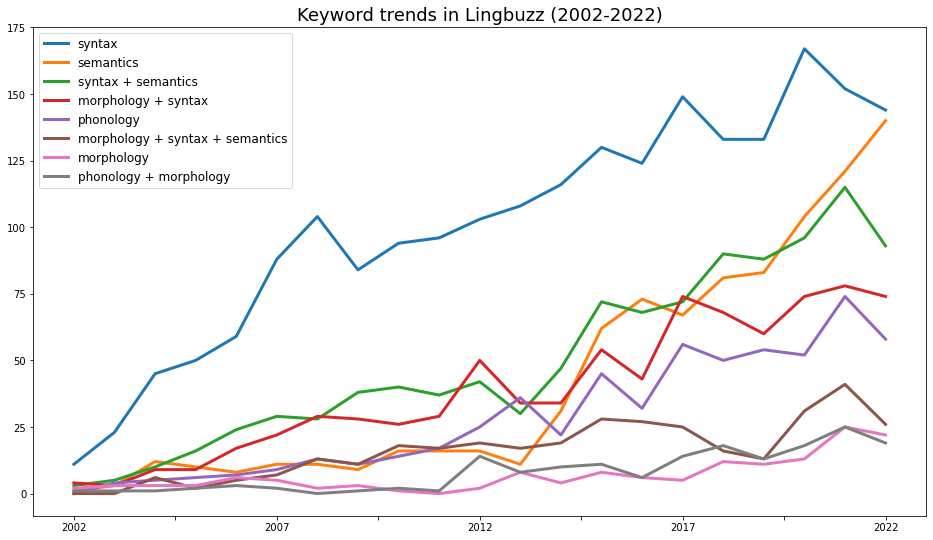

In [17]:
# Now we can plot the graph
df_key.plot(kind='line', stacked=False, figsize=(16, 9), linewidth=3)

# Add labels and title
plt.xlabel('')
#plt.ylabel('Number of manuscripts')
plt.title('Keyword trends in Lingbuzz (2002-2022)', fontsize=18)
plt.legend(fontsize=12);

In [18]:
# This function returns a dictionary with a pair of authors (tuple) as key, and the number of papers they wrote together as value
def network_connections():
    connections = {}
    for cell in df_main['Authors']:
        authors = cell.split(', ')
        conn_by_paper = []
        for a in authors:
            for b in authors:
                if a != b:
                    conn = frozenset({a, b})
                    conn_by_paper.append(conn)
        conn_by_paper = set(conn_by_paper)
        for i in conn_by_paper:
            if i in connections.keys():
                connections[i] += 1
            else:
                connections[i] = 1
    return {tuple(key): value for key, value in connections.items()}


In [27]:
connections = network_connections()

In [26]:
# This shows the pairs of authors who wrote together more than 8 papers
for pair in sorted(connections.keys(), reverse=True, key= lambda x: connections[x]):
    ms_together = connections[pair]
    if ms_together > 8:
        print(pair,ms_together)

('Emmanuel Chemla', 'Philippe Schlenker') 16
('Bob Levine', 'Yusuke Kubota') 16
('Karen De Clercq', 'Guido Vanden Wyngaerd') 16
('Shigeto Kawahara', 'Gakuji Kumagai') 13
('Thomas McFadden', 'Sandhya Sundaresan') 11
('Franc Lanko Marušič', 'Rok Zaucer') 10
('Benjamin Van Durme', 'Aaron Steven White') 10
('Andrew Ira Nevins', 'Karlos Arregi') 9
('Paul Postal', 'Chris Collins') 9
('Alexandru Nicolae', 'Adina DRAGOMIRESCU') 9
('Karen De Clercq', 'Pavel Caha') 9
('Guido Vanden Wyngaerd', 'Pavel Caha') 9


In [29]:
# Create a graph with the data:

import networkx as nx

G = nx.Graph()

for key, value in connections.items():
    G.add_edge(key[0], key[1], weight=value)

In [39]:
co_authorship_networks = list(nx.connected_components(G))

size_networks = [len(network) for network in co_authorship_networks]

print(f'There are {len(size_networks)} co-authorship networks in Lingbuzz.')
print(f'The five bigger ones have the following number of authors in them: {sorted(size_networks, reverse=True)[:5]}')

There are 211 co-authorship networks in Lingbuzz.
The five bigger ones have the following number of authors in them: [1530, 19, 13, 13, 12]
